In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

%matplotlib inline

In [3]:
digits = load_digits()

In [8]:
digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [9]:
digits.data.shape

(1797, 64)

In [11]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

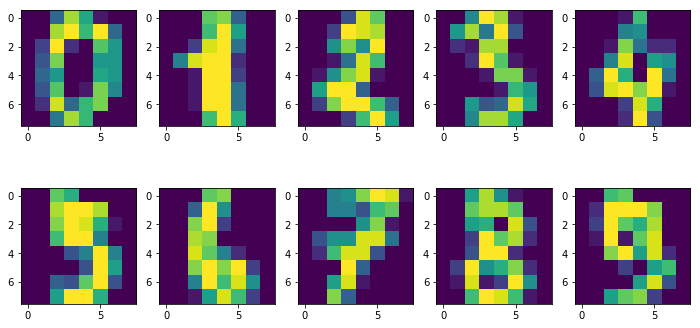

In [12]:
#visulization
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
for image, ax in zip(digits.images, axes.ravel()):
    ax.imshow(image)

In [13]:
#pca
pca = PCA(n_components=2, whiten=True, random_state=0)
pca.fit(digits.data)
data_pca = pca.transform(digits.data)

In [14]:
data_pca.shape

(1797, 2)

In [25]:
#visulize pca data
df = pd.DataFrame(data_pca, columns=["n_1", "n_2"])
df["target"] = digits.target

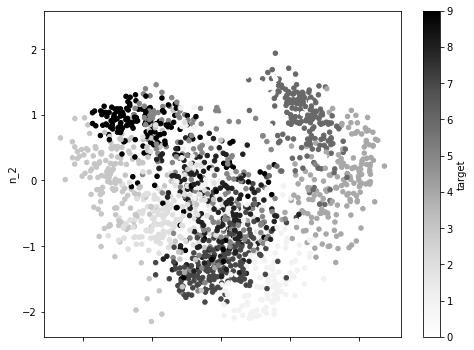

In [29]:
df.plot.scatter(x="n_1", y="n_2", c="target", figsize=(8, 6));

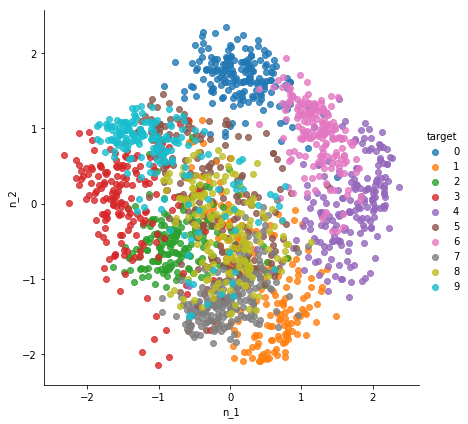

In [38]:
sns.lmplot(x="n_1", y="n_2", data=df, fit_reg=False, hue="target", height=6)
sns.despine();

In [39]:
#tsne
tsne = TSNE(random_state=0)
data_tsne = tsne.fit_transform(digits.data)

In [40]:
data_tsne.shape

(1797, 2)

In [43]:
df_tsne = pd.DataFrame(data_tsne, columns=["n_1", "n_2"])
df_tsne["target"] = digits.target

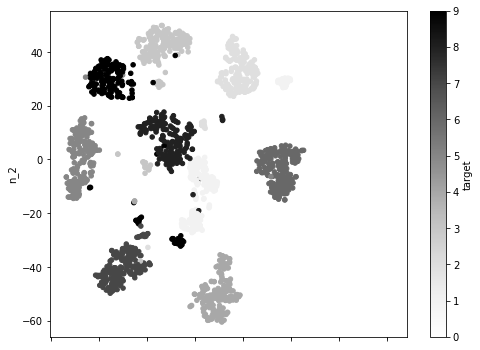

In [44]:
df_tsne.plot.scatter(x="n_1", y="n_2", c="target", figsize=(8, 6));

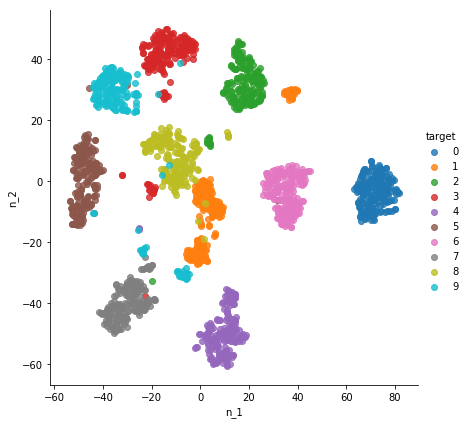

In [47]:
sns.lmplot(x="n_1", y="n_2", data=df_tsne, fit_reg=False, hue="target", height=6);

In [81]:
#kmeans
kmeans = KMeans(n_clusters=10)
kmeans.fit(digits.data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [82]:
df_tsne["kmeans_labels"] = kmeans.labels_

In [83]:
df_tsne.head()

,n_1,n_2,target,kmeans_labels
0,75.660675,-1.324398,0,6
1,3.668361,-14.555626,1,2
2,2.729776,12.698335,2,2
3,-18.885572,39.430984,3,8
4,13.015765,-45.131828,4,7


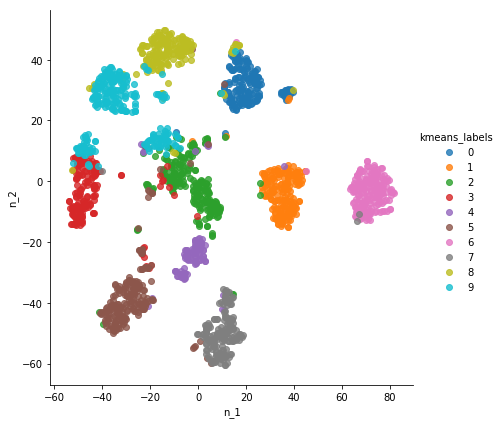

In [84]:
sns.lmplot(x="n_1", y="n_2", data=df_tsne, fit_reg=False, hue="kmeans_labels", height=6);